In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
df = pd.read_csv("/home/artur/ml_shared/week5/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data = df.drop(["Outcome"], axis=1).values

In [10]:
data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

In [12]:
standard_data = (data - mean) / std_dev
standard_df = pd.DataFrame(standard_data, columns=df.drop(["Outcome"],axis=1).columns)

In [13]:
standard_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
sk_features_scaled = scaler.transform(df.drop("Outcome",axis=1))

In [20]:
df_features_scaled = pd.DataFrame(sk_features_scaled, columns=df.columns[:8])

In [21]:
df_features_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df_features_scaled
y = df["Outcome"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=22)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
from sklearn.neighbors import KNeighborsClassifier


In [27]:
K = 1
KNN = KNeighborsClassifier(K)

In [29]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred = KNN.predict(X_test)

In [31]:
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [32]:
print(confusion_matrix(y_test, pred))
print("---------------")
print(classification_report(y_test, pred))

[[120  30]
 [ 31  50]]
---------------
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       150
           1       0.62      0.62      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [33]:
error_rate = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

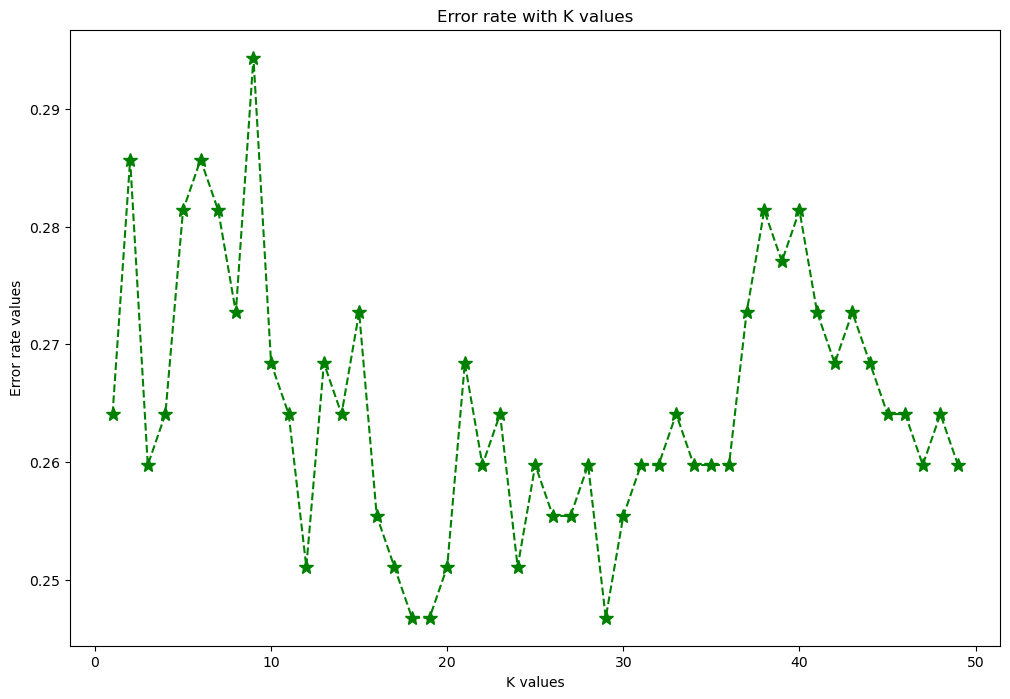

In [34]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit),error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [41]:

K = 19
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print("---------------")
print(classification_report(y_test, pred))

[[134  16]
 [ 41  40]]
---------------
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       150
           1       0.71      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231

